<a href="https://colab.research.google.com/github/manishm30/ml-/blob/main/kmean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
mall_df=pd.read_csv("mall.csv")
mall_df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
mall_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
mall_df.rename(columns={"Genre":"Gender"},inplace=True)
mall_df.rename(columns={"Annual Income (k$)":"Annual Income"},inplace=True)
mall_df.rename(columns={"Spending Score (1-100)":"Spending Score"},inplace=True)
mall_df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data_2d=mall_df[["Annual Income","Spending Score"]]
data_2d.head()

,Annual Income,Spending Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


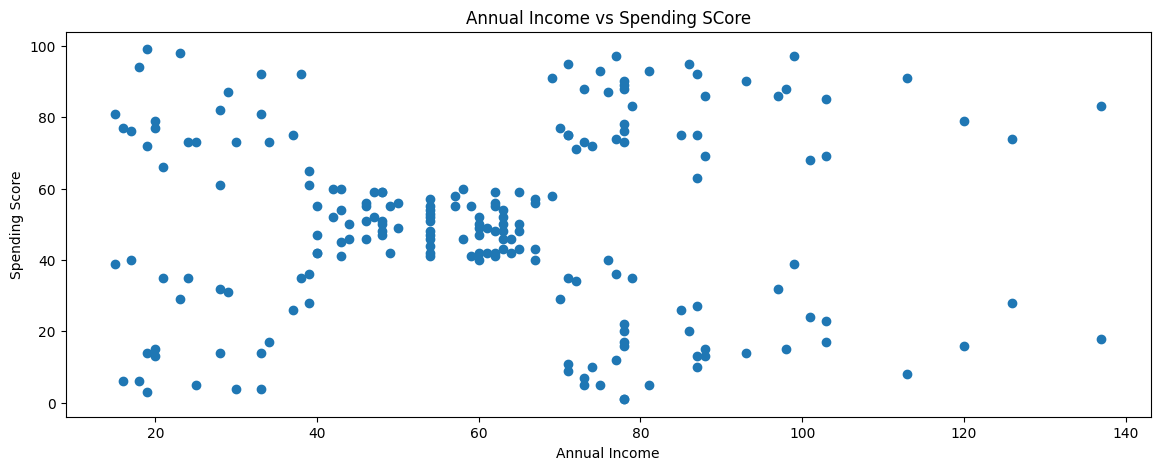

In [ ]:
plt.figure(figsize=(14,5))
plt.scatter(data_2d['Annual Income'],data_2d['Spending Score'])
plt.title('Annual Income vs Spending SCore')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
kmeans_2d = KMeans(n_clusters = 5, random_state = 10)
kmeans_2d.fit(data_2d)
labels_2d = kmeans_2d.predict(data_2d)
print(labels_2d)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 1 3 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 4 2 1 2 4 2 4 2 1 2 4 2 4 2 4 2 4 2 1 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


In [ ]:
import warnings
warnings.filterwarnings("ignore")

data_2d['Label']= labels_2d
data_2d.head()

,Annual Income,Spending Score,Label
0,15,39,3
1,15,81,0
2,16,6,3
3,16,77,0
4,17,40,3


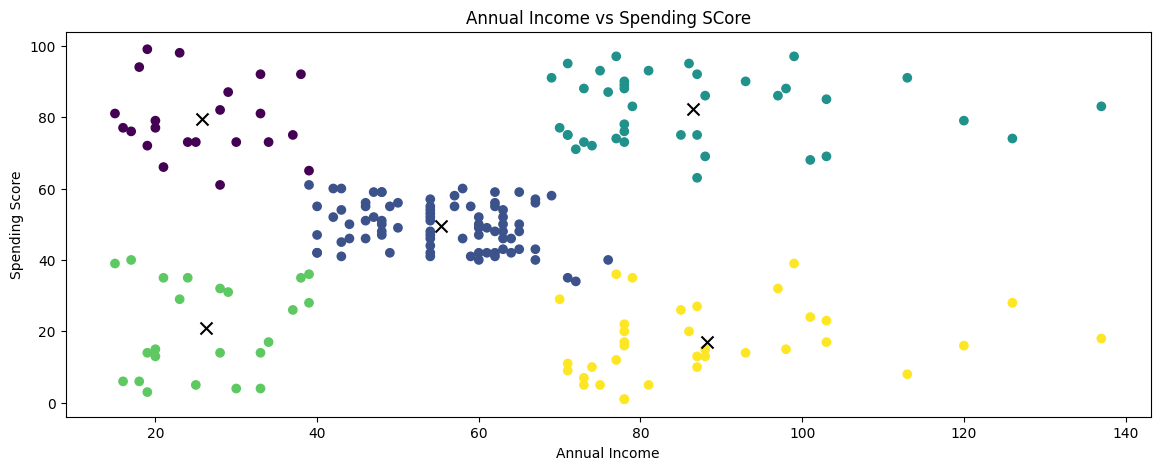

In [ ]:
plt.figure(figsize=(14,5))
plt.scatter(data_2d['Annual Income'],data_2d['Spending Score'],c=labels_2d)
plt.scatter(kmeans_2d.cluster_centers_[:,0],kmeans_2d.cluster_centers_[:,1],marker='x',c='black',s=75)
plt.title('Annual Income vs Spending SCore')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [ ]:
wcss = []
clusters = range(1, 11)
for k in clusters :
  kmeans = KMeans(n_clusters = k, random_state = 10)
  kmeans.fit(data_2d)
  wcss.append(kmeans.inertia_)
wcss_data = pd.DataFrame({'Clusters': clusters, 'wcss' : wcss})
wcss_data

,Clusters,wcss
0,1,270308.160000
1,2,181636.686869
2,3,106482.558556
3,4,73721.817461
4,5,44448.455448
5,6,37265.865205
6,7,30290.060979
7,8,25056.396738
8,9,21901.020399
9,10,19694.598086


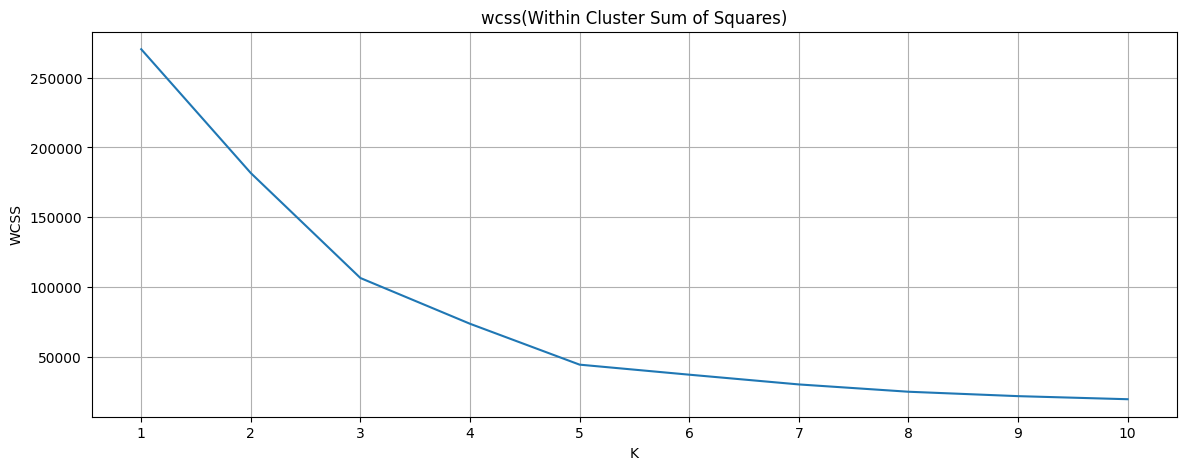

In [ ]:
plt.figure(figsize=(14,5))
plt.title('wcss(Within Cluster Sum of Squares)')
plt.plot(clusters,wcss)
plt.xlabel("K")
plt.ylabel("WCSS")
plt.grid()
plt.xticks(range(1,11))
plt.show()